In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Modeling and Evaluation 3

## Logistic Regression

In [3]:
hs_2017 = pd.read_csv("https://github.com/jeffweltman/MSDS7331/raw/master/hs_2017.csv",index_col=0)
hs_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 469
Columns: 395 entries, student_num to nc_district
dtypes: float64(323), int64(72)
memory usage: 1.3 MB


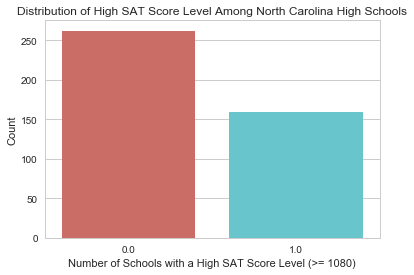

0.0    262
1.0    159
Name: sat_high_level, dtype: int64

In [5]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='sat_high_level',data=hs_2017, palette='hls')
plt.xlabel('Number of Schools with a High SAT Score Level (>= 1080)')
plt.ylabel('Count')
plt.title('Distribution of High SAT Score Level Among North Carolina High Schools')
plt.show()
hs_2017['sat_high_level'].value_counts()

In [6]:
Y=hs_2017['sat_high_level'].values
hs_2017=hs_2017.drop({'sat_high_level','sat_avg_score_num','lea_sat_avg_score_num'}, axis=1) 
X_highSchools=hs_2017

In [7]:
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

In [9]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X_highSchools, Y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X_highSchools, Y, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(Y,predictions)
    confMat = confusion_matrix(Y,predictions)
    acc = accuracy_score(Y,predictions)
    
    print(classReport)
    print(confMat)
    print(acc)

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

#create a pipeline to scale all of the data and perform logistic regression during each grid search step.
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Define a range of hyper parameters for grid search
parameters = { 'logisticregression__penalty':['l2']
              ,'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'logisticregression__class_weight': ['balanced','none']
              ,'logisticregression__random_state': [0]
              ,'logisticregression__solver': ['lbfgs']
              ,'logisticregression__max_iter':[100,500]
             }

#Perform the grid search using accuracy as a metric during cross validation.
grid = GridSearchCV(pipe, parameters, cv=cv, scoring='accuracy')

#Use the best features from recursive feature elimination during the grid search
grid.fit(X_highSchools, Y)

#display the best pipeline model identified during the grid search
grid.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.01, class_weight='none', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False))])

In [11]:
EvaluateClassifierEstimator(grid.best_estimator_, X_highSchools, Y, cv)

The average accuracy for all cv folds is: 			 0.86824
The average precision for all cv folds is: 			 0.85063
The average recall for all cv folds is: 			 0.80025
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.882353,0.875000,0.823529
1,0.835294,0.892857,0.694444
2,0.835294,0.800000,0.842105
3,0.811765,0.729730,0.818182
4,0.870588,0.814815,0.785714
5,0.882353,0.923077,0.750000
6,0.894118,0.900000,0.818182
7,0.894118,0.875000,0.848485
8,0.847059,0.838710,0.764706
9,0.929412,0.857143,0.857143


# Modeling and Evaluation 3

## LASSO

# Modeling and Evaluation 4


# Modeling and Evaluation 5

# Modeling and Evaluation 6

# Deployment